**IMPORT LIBRARY**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
df=pd.read_csv('seattle-weather.csv')
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


**CLEANING DATA**

In [4]:
df=df.dropna()
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [22]:
df=df.drop_duplicates()
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,0
1,2012-01-02,10.9,10.6,2.8,4.5,2
2,2012-01-03,0.8,11.7,7.2,2.3,2
3,2012-01-04,20.3,12.2,5.6,4.7,2
4,2012-01-05,1.3,8.9,2.8,6.1,2
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,2
1457,2015-12-28,1.5,5.0,1.7,1.3,2
1458,2015-12-29,0.0,7.2,0.6,2.6,1
1459,2015-12-30,0.0,5.6,-1.0,3.4,4


**PRA PREPROCESSING**

**LABEL ENCODER FOR WEATHER COLUMNS**

In [5]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
df['weather']=encoder.fit_transform(df['weather'])

In [6]:
input_features = ['precipitation','temp_max','temp_min','wind','weather']
output_features = ['precipitation','temp_max','temp_min','wind','weather']

In [7]:
X=df[input_features].values
y=df[output_features].values

**MIN MAX SCALER FOR STANDARDIZATION DATA**

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
y_scaled=scaler.fit_transform(y)

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val=train_test_split(X_scaled,y_scaled,test_size=0.2,shuffle=False)

In [10]:
timesteps=30
n_features_input=len(input_features)
n_features_output=len(output_features)

**SLIDING WINDOW**

In [11]:
def sequences(X,y,time_steps=1):
  X_seq,y_seq=[],[]

  for i in range(len(X)-time_steps):
      X_seq.append(X[i:i+time_steps])
      y_seq.append(y[i+time_steps])
  return np.array(X_seq),np.array(y_seq)

In [12]:
X_train_seq,y_train_seq=sequences(X_train,y_train,timesteps)
X_val_seq,y_val_seq=sequences(X_val,y_val,timesteps)

**CREATE LSTM MODEL**

In [13]:
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(timesteps,n_features_input)))
model.add(Dropout(0.2))
model.add(LSTM(units=30))
model.add(Dropout(0.2))
model.add(Dense(n_features_output))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.compile(optimizer='adam',loss='mse')

In [15]:
history=model.fit(X_train_seq,y_train_seq,validation_data=(X_val_seq,y_val_seq),epochs=100)

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - loss: 0.1606 - val_loss: 0.0371
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0437 - val_loss: 0.0289
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0374 - val_loss: 0.0285
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0374 - val_loss: 0.0301
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0374 - val_loss: 0.0282
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0341 - val_loss: 0.0280
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0354 - val_loss: 0.0298
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0325 - val_loss: 0.0276
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0333 - val_loss: 0.0282
Epoch 10/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0343 - val_loss: 0.0281
Epoch 11/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0340 - val_loss: 0.0276
Epoch 12/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/ste

In [16]:
y_pred=model.predict(X_val_seq)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step


In [17]:
y_pred_invers=scaler.inverse_transform(y_pred)

In [18]:
y_val_invers=scaler.inverse_transform(y_val_seq)

**VISUALIZATION**

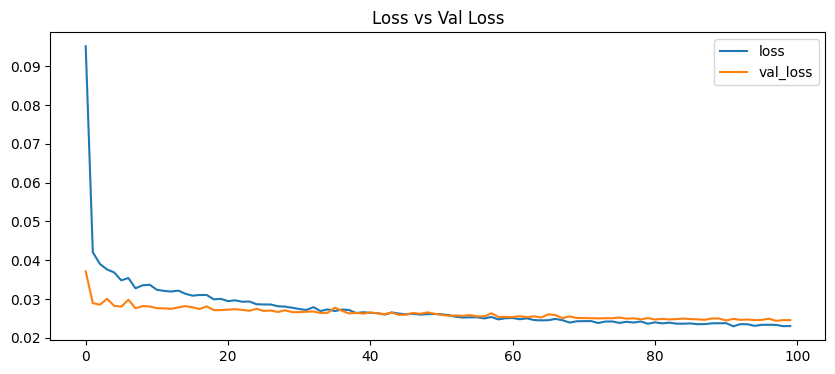

In [19]:
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.title('Loss vs Val Loss')
plt.legend()
plt.show()

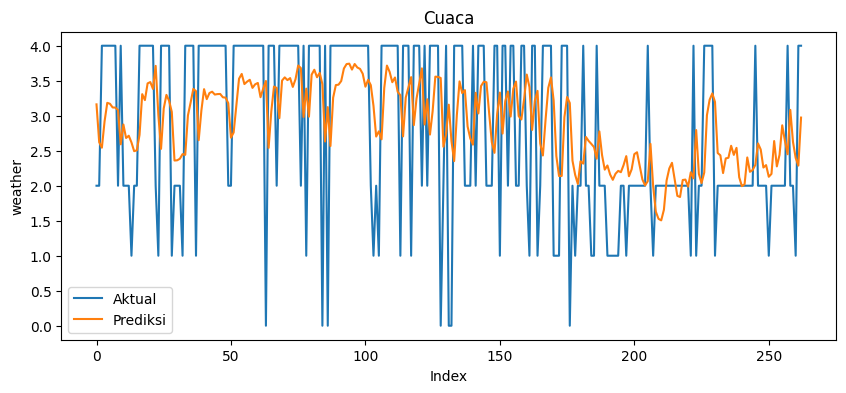

In [20]:
target_index=4
plt.figure(figsize=(10,4))
plt.plot(y_val_invers[:,4],label='Aktual')
plt.plot(y_pred_invers[:,4],label='Prediksi')
plt.xlabel('Index')
plt.ylabel(output_features[4])
plt.title('Cuaca')
plt.legend()
plt.show()

**SAVE THE RESULT OF PREDICTION**

In [21]:
target_index=4

data_export={
    "Data asli":y_val_invers[:,target_index],
    "Data prediksi":y_pred_invers[:,target_index]
}
data_export=pd.DataFrame(data_export)
data_export.to_excel("output_weather.xlsx")